# 📘 Materials Characterization: Stress-Strain Analysis> Fit constitutive models to stress-strain data⏱️ **20-30 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Engineering**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/engineering/materials_characterization.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $\sigma = E \cdot \epsilon$ (Linear elastic)**Applications:** Young's modulus determination, material testing---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def linear_elastic(strain, E):
    return E * strain

def power_law(strain, K, n):
    return K * strain**n

## Generate Stress-Strain Data

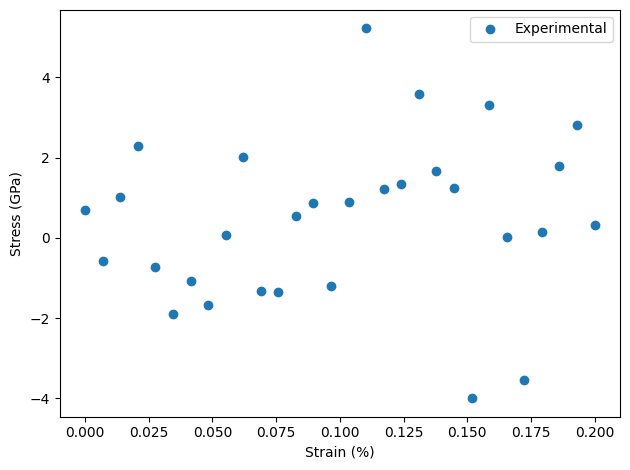

In [5]:
E_true = 200  # GPa (steel)
strain = np.linspace(0, 0.002, 30)  # 0.2% strain
stress_true = linear_elastic(strain, E_true)
stress = stress_true + np.random.normal(0, 2, len(strain))

plt.plot(strain*100, stress, 'o', label='Experimental')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (GPa)')
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.show()


## Determine Young's Modulus

In [6]:
popt, pcov = curve_fit(linear_elastic, strain, stress, p0=[180])
E_fit = popt[0]
E_err = np.sqrt(pcov[0,0])

print(f'Young\'s Modulus: {E_fit:.1f} ± {E_err:.1f} GPa')
print('\nLiterature value for steel: 200 GPa')
print(f'Error: {abs(E_fit - E_true)/E_true * 100:.1f}%')

INFO:nlsq.curve_fit:Starting curve fit n_params=1 | n_data_points=30 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=1 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=1 | n_residuals=30 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=59.44247518764435 | grad_norm=0.0119 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=57.956884223288284 | grad_norm=0.0046 | step=360.0 | nfev=2


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.460077s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=2 | final_cost=57.6979 | elapsed=1.460s | final_gradient_norm=8.6736e-19


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.994056s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.9941 | final_cost=115.3957 | covariance_warning=False


Young's Modulus: 472.8 ± 312.7 GPa

Literature value for steel: 200 GPa
Error: 136.4%


## Key Insights1. **Linear region gives elastic modulus**2. **Slope = Young's modulus E**3. **Yield point** where linearity breaks down---